# PROYECTO DE DATA SCIENCE - ANÁLISIS DE COMPRA DE BICICLETAS

## Metodología CRISP-DM

Este proyecto sigue la metodología CRISP-DM (Cross-Industry Standard Process for Data Mining) para el análisis de datos y construcción de modelos predictivos.

---

## 1. COMPRENSIÓN DEL NEGOCIO

### Objetivos del Proyecto
El objetivo principal es **analizar qué factores influyen en la decisión de compra de bicicletas por parte de los clientes**. Este análisis permitirá:
- Identificar patrones y características demográficas de los clientes que compran bicicletas
- Entender la relación entre variables socioeconómicas y la decisión de compra
- Desarrollar un modelo predictivo que permita identificar clientes potenciales

### Objetivos de Data Science
- **Variable a predecir**: `Purchased Bike` (compró/no compró bicicleta)
- **Tipo de problema**: Clasificación binaria
- **Meta del proyecto**: Construir un modelo que prediga la probabilidad de compra de bicicleta basado en características del cliente


## 2. COMPRENSIÓN DE LOS DATOS

### Recolección de los Datos Iniciales
- **Fuente**: Archivo CSV `bike_buyers.csv`
- **Tamaño**: 1000 registros con 13 variables
- **Variables**: Información demográfica, socioeconómica y de comportamiento de clientes

### Descripción de los Datos
El dataset contiene información sobre clientes y su decisión de compra de bicicletas, incluyendo:
- **Variables demográficas**: Estado civil, género, edad
- **Variables económicas**: Ingresos, ocupación, educación
- **Variables de estilo de vida**: Hijos, vehículos, propiedad de vivienda, distancia de desplazamiento, región
- **Variable objetivo**: Purchased Bike (compró/no compró)


In [31]:
# --- 1. Comprensión del Negocio ---
# El objetivo es analizar qué factores influyen en la decisión de compra de bicicletas.
# Esto permitirá identificar patrones y características de los clientes que compran bicicletas.

# --- 2. Comprensión de los Datos ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
df = pd.read_csv("bike_buyers.csv")

print("Dimensiones del dataset:", df.shape)
display(df.head())

# --- 3. Limpieza de Datos ---
print("ANÁLISIS DE VALORES NULOS")
print("="*50)
null_counts = df.isnull().sum()
print("Valores nulos por columna:")
print(null_counts[null_counts > 0])

# Guardar el dataset original antes de limpiar
df_original = df.copy()

# Limpiar valores nulos en variables numéricas
num_cols_to_clean = ["Income", "Children", "Cars", "Age"]
for col in num_cols_to_clean:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)
        print(f"✓ {col}: {df_original[col].isnull().sum()} valores nulos rellenados con mediana ({median_value:.2f})")

# Limpiar valores nulos en variables categóricas
cat_cols_to_clean = ["Marital Status", "Gender", "Home Owner"]
for col in cat_cols_to_clean:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0] if not df[col].mode().empty else "Unknown"
        df[col] = df[col].fillna(mode_value)
        print(f"✓ {col}: {df_original[col].isnull().sum()} valores nulos rellenados con moda ('{mode_value}')")

print(f"\n✓ Limpieza completada: {df.isnull().sum().sum()} valores nulos restantes")




Dimensiones del dataset: (1000, 13)


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


ANÁLISIS DE VALORES NULOS
Valores nulos por columna:
Marital Status     7
Gender            11
Income             6
Children           8
Home Owner         4
Cars               9
Age                8
dtype: int64
✓ Income: 6 valores nulos rellenados con mediana (60000.00)
✓ Children: 8 valores nulos rellenados con mediana (2.00)
✓ Cars: 9 valores nulos rellenados con mediana (1.00)
✓ Age: 8 valores nulos rellenados con mediana (43.00)
✓ Marital Status: 7 valores nulos rellenados con moda ('Married')
✓ Gender: 11 valores nulos rellenados con moda ('Male')
✓ Home Owner: 4 valores nulos rellenados con moda ('Yes')

✓ Limpieza completada: 0 valores nulos restantes


In [32]:
# Información general del dataset
print("Información general:")
df.info()


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    1000 non-null   object 
 2   Gender            1000 non-null   object 
 3   Income            1000 non-null   float64
 4   Children          1000 non-null   float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        1000 non-null   object 
 8   Cars              1000 non-null   float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               1000 non-null   float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [33]:
# Estadísticas descriptivas
print("Estadísticas descriptivas:")
display(df.describe())


Estadísticas descriptivas:


,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56290.000000,1.911000,1.451000,44.172000
std,5347.333948,30975.722678,1.620403,1.117519,11.316912
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


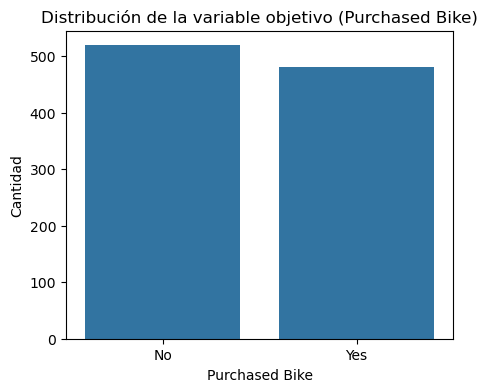

In [34]:
# --- 4. Visualizaciones ---
# Distribución de la variable objetivo
plt.figure(figsize=(5,4))
sns.countplot(x="Purchased Bike", data=df)
plt.title("Distribución de la variable objetivo (Purchased Bike)")
plt.xlabel("Purchased Bike")
plt.ylabel("Cantidad")
plt.show()


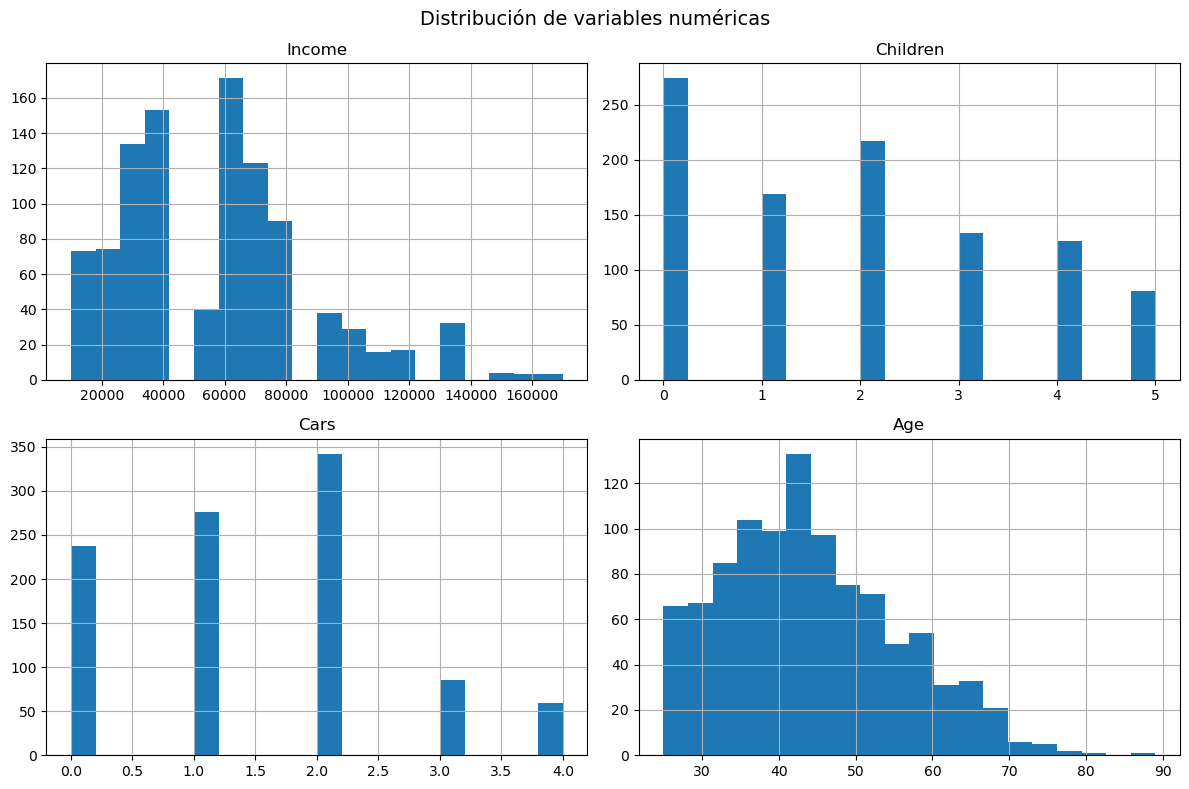

In [35]:
# Separar variables numéricas y categóricas
num_cols = ["Income", "Children", "Cars", "Age"]
cat_cols = ["Marital Status", "Gender", "Education", "Occupation", "Home Owner", "Commute Distance", "Region"]

# Visualización de variables numéricas
df[num_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Distribución de variables numéricas", fontsize=14)
plt.tight_layout()
plt.show()


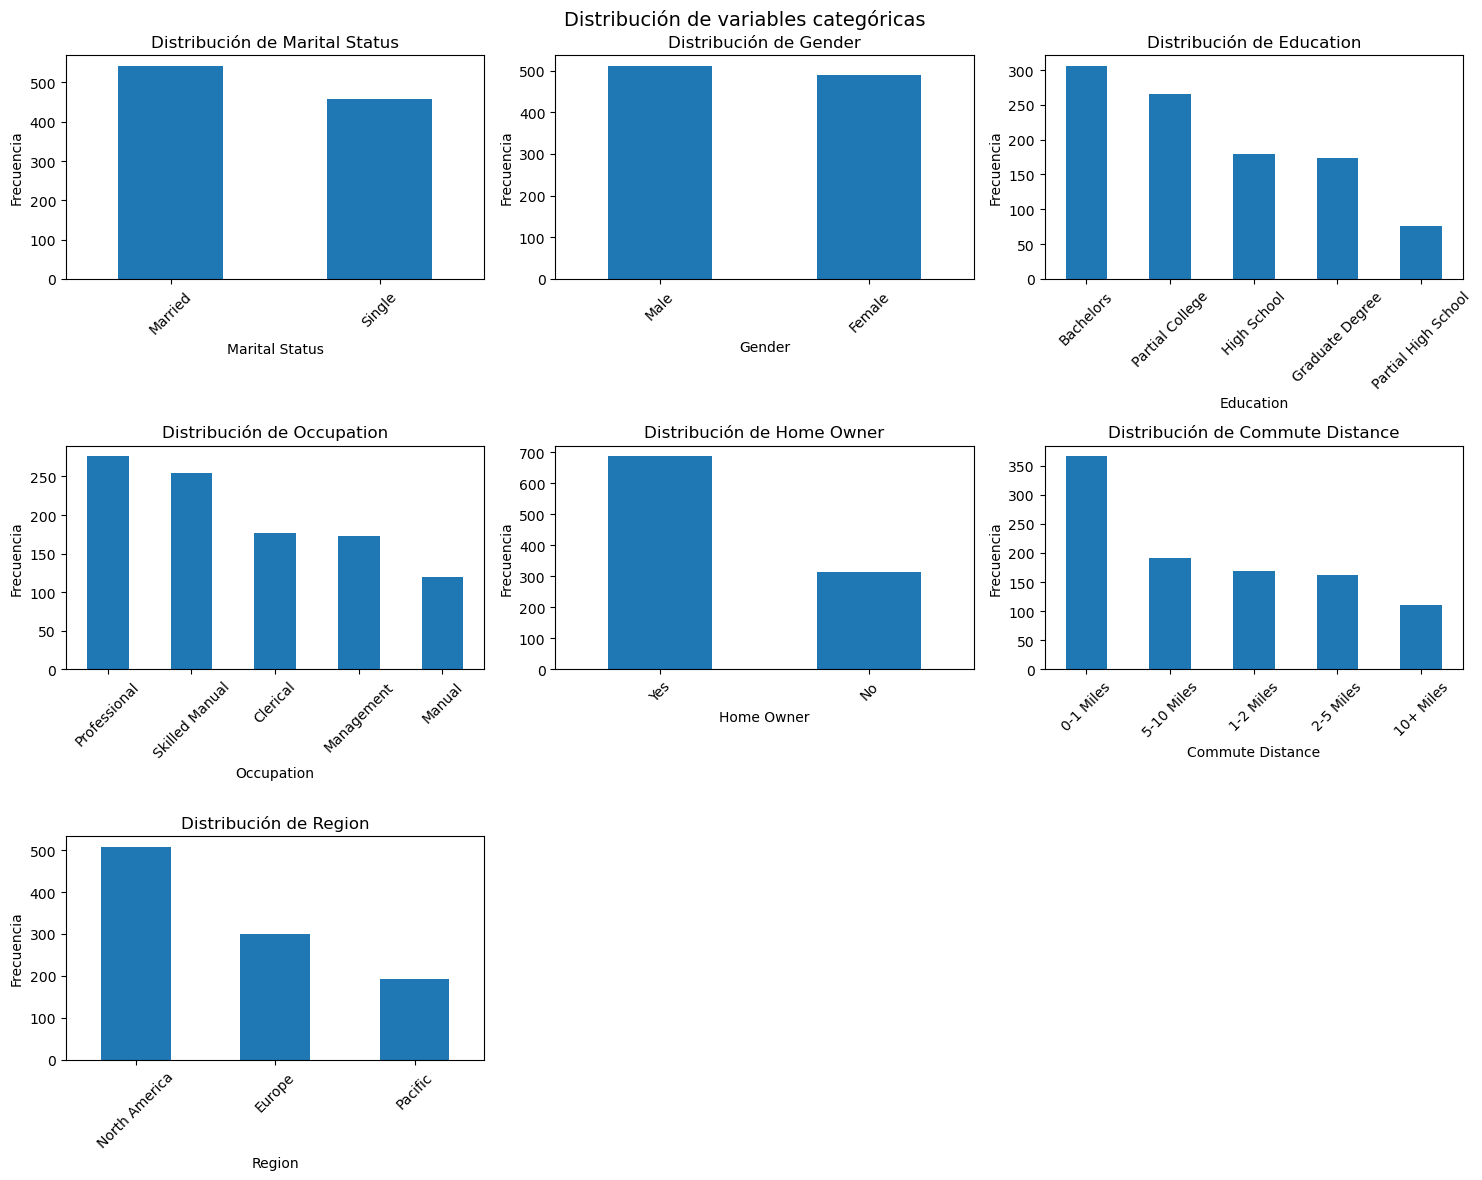

In [36]:
# Gráficos de barras para variables categóricas
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(cat_cols):
    if i < len(axes):
        df[col].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f"Distribución de {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frecuencia")
        axes[i].tick_params(axis='x', rotation=45)

# Ocultar ejes vacíos
for i in range(len(cat_cols), len(axes)):
    axes[i].axis('off')

plt.suptitle("Distribución de variables categóricas", fontsize=14)
plt.tight_layout()
plt.show()


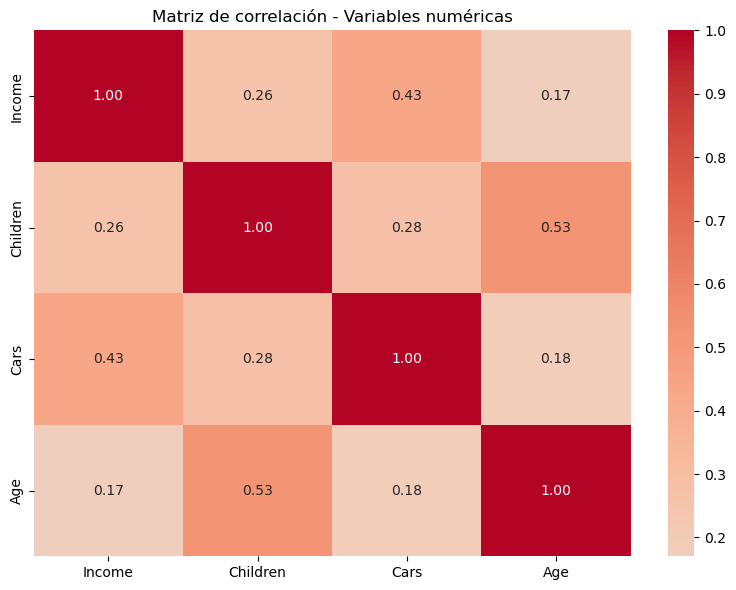

In [37]:
# Correlaciones entre variables numéricas
plt.figure(figsize=(8, 6))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt='.2f')
plt.title("Matriz de correlación - Variables numéricas")
plt.tight_layout()
plt.show()


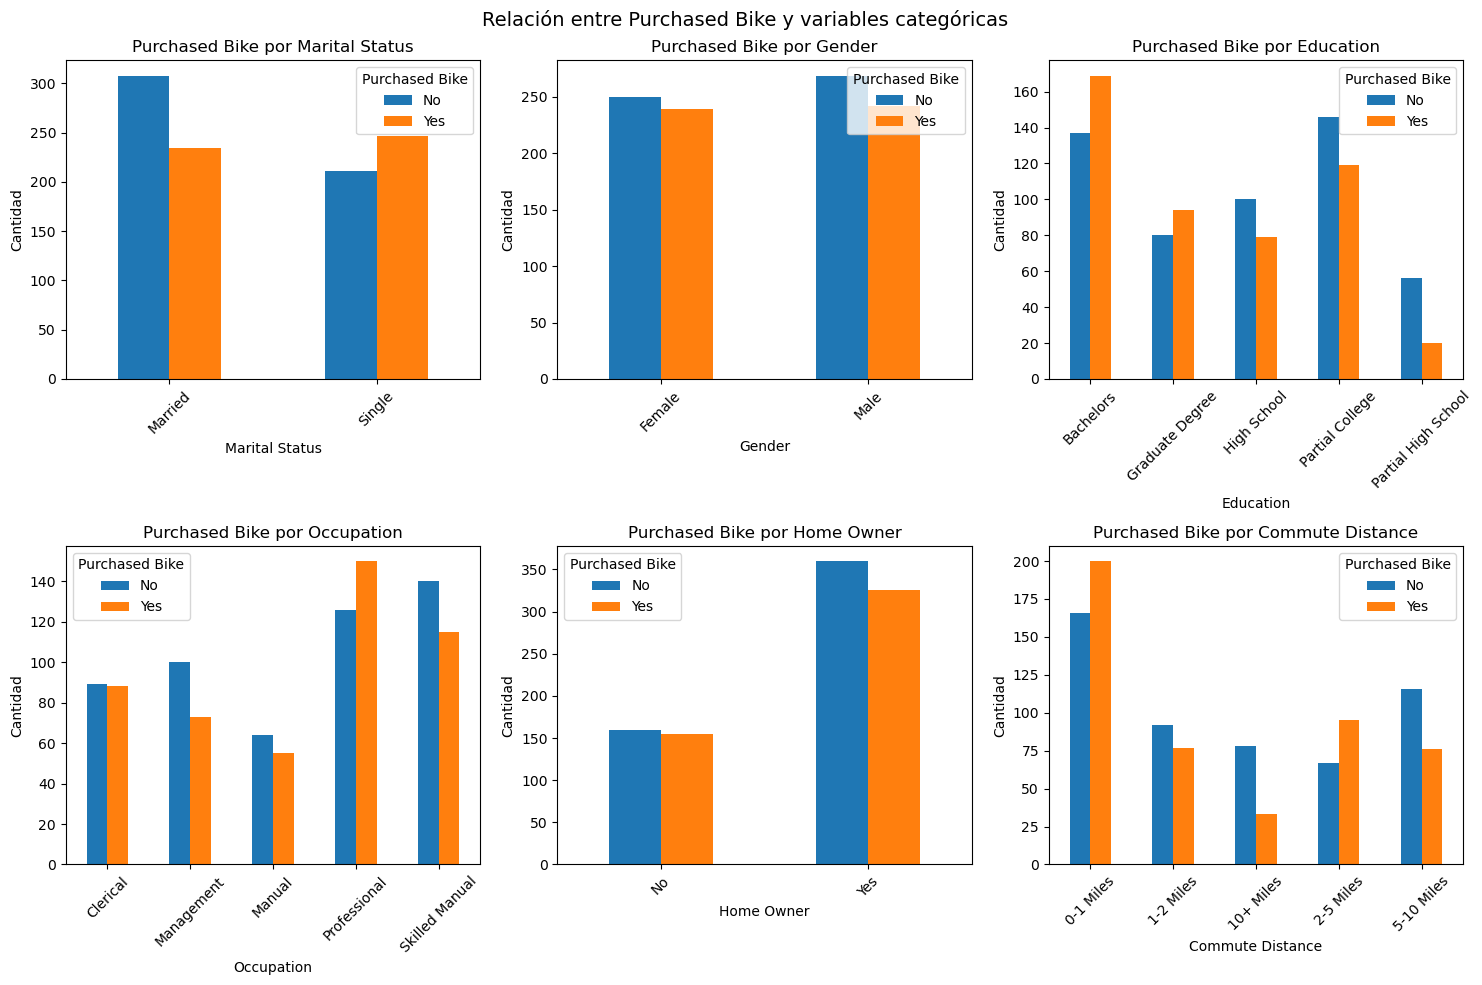

In [38]:
# Análisis de la variable objetivo vs variables categóricas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(cat_cols[:6]):
    if i < len(axes):
        pd.crosstab(df[col], df["Purchased Bike"]).plot(kind='bar', ax=axes[i], stacked=False)
        axes[i].set_title(f"Purchased Bike por {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Cantidad")
        axes[i].legend(title="Purchased Bike")
        axes[i].tick_params(axis='x', rotation=45)

plt.suptitle("Relación entre Purchased Bike y variables categóricas", fontsize=14)
plt.tight_layout()
plt.show()


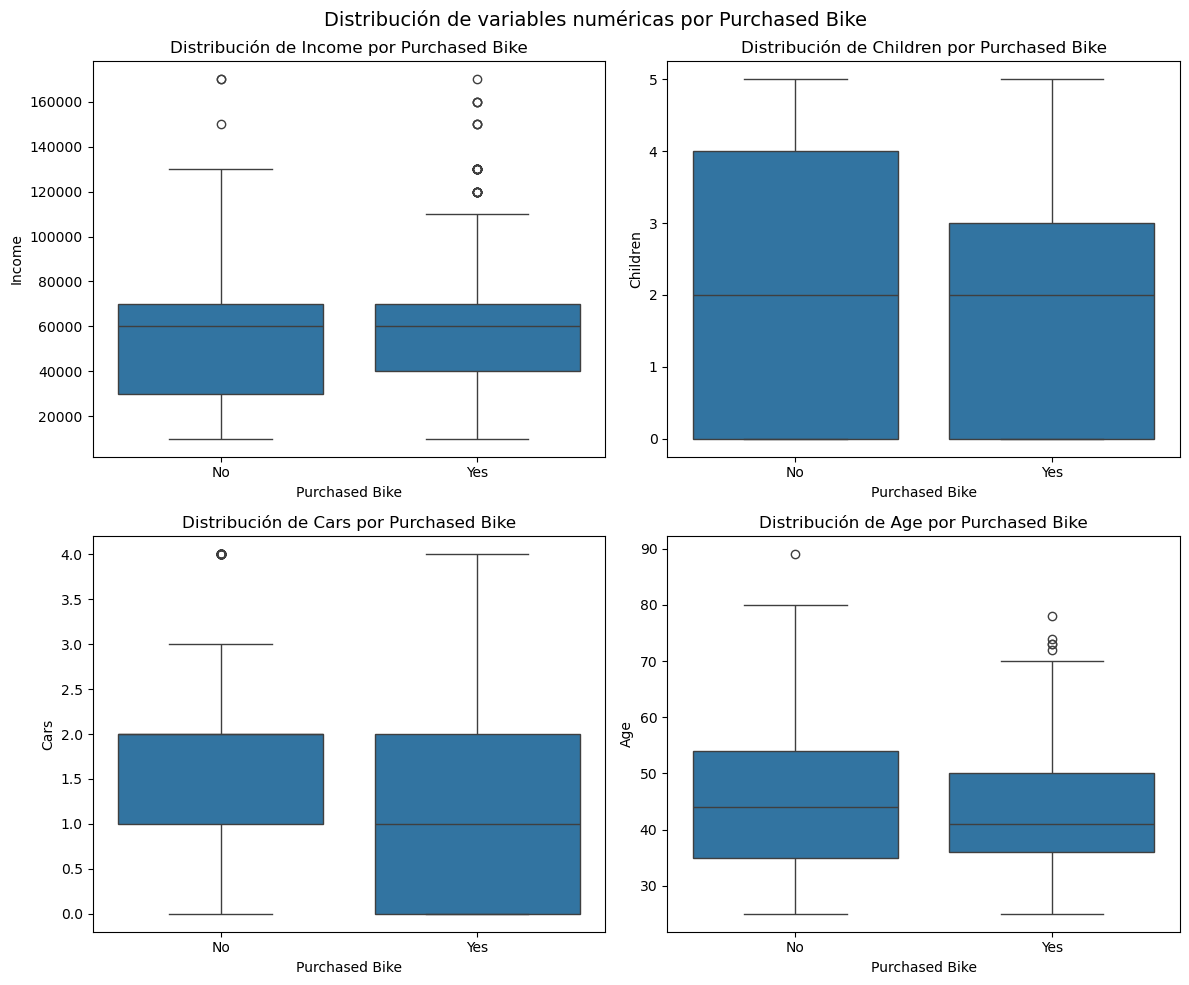

In [39]:
# Boxplots: Variables numéricas vs Purchased Bike
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.boxplot(x="Purchased Bike", y=col, data=df, ax=axes[i])
    axes[i].set_title(f"Distribución de {col} por Purchased Bike")
    axes[i].set_xlabel("Purchased Bike")
    axes[i].set_ylabel(col)

plt.suptitle("Distribución de variables numéricas por Purchased Bike", fontsize=14)
plt.tight_layout()
plt.show()


PREGUNTA 1: Promedio de ingresos según compra de bicicleta

Promedio de ingresos:
Purchased Bike
No     54874.759152
Yes    57817.047817
Name: Income, dtype: float64


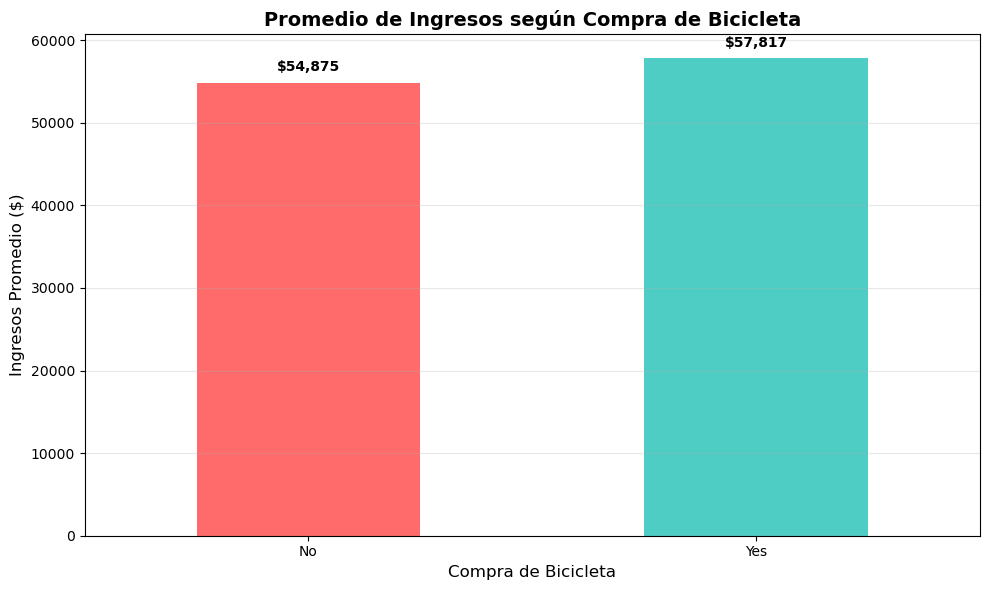


Tabla de datos:


,Compra de Bicicleta,Promedio de Ingresos,Cantidad de Clientes
0,No,54874.759152,519
1,Yes,57817.047817,481


In [40]:
# --- REQUERIMIENTOS: RESPUESTA A LAS PREGUNTAS ---

# PREGUNTA 1: ¿Cuánto es el promedio de ingresos de acuerdo con si la bicicleta fue comprada o no por el cliente?
print("="*70)
print("PREGUNTA 1: Promedio de ingresos según compra de bicicleta")
print("="*70)

promedio_ingresos_compra = df.groupby('Purchased Bike')['Income'].mean()
print("\nPromedio de ingresos:")
print(promedio_ingresos_compra)

# Visualización
plt.figure(figsize=(10, 6))
promedio_ingresos_compra.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'])
plt.title('Promedio de Ingresos según Compra de Bicicleta', fontsize=14, fontweight='bold')
plt.xlabel('Compra de Bicicleta', fontsize=12)
plt.ylabel('Ingresos Promedio ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(promedio_ingresos_compra.values):
    plt.text(i, v + 1000, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Tabla complementaria
tabla_compra = pd.DataFrame({
    'Compra de Bicicleta': promedio_ingresos_compra.index,
    'Promedio de Ingresos': promedio_ingresos_compra.values,
    'Cantidad de Clientes': df.groupby('Purchased Bike')['Income'].count().values
})
print("\nTabla de datos:")
display(tabla_compra)


PREGUNTA 2: Promedio de ingresos según estado civil

Promedio de ingresos por estado civil:
Marital Status
Married    58653.136531
Single     53493.449782
Name: Income, dtype: float64


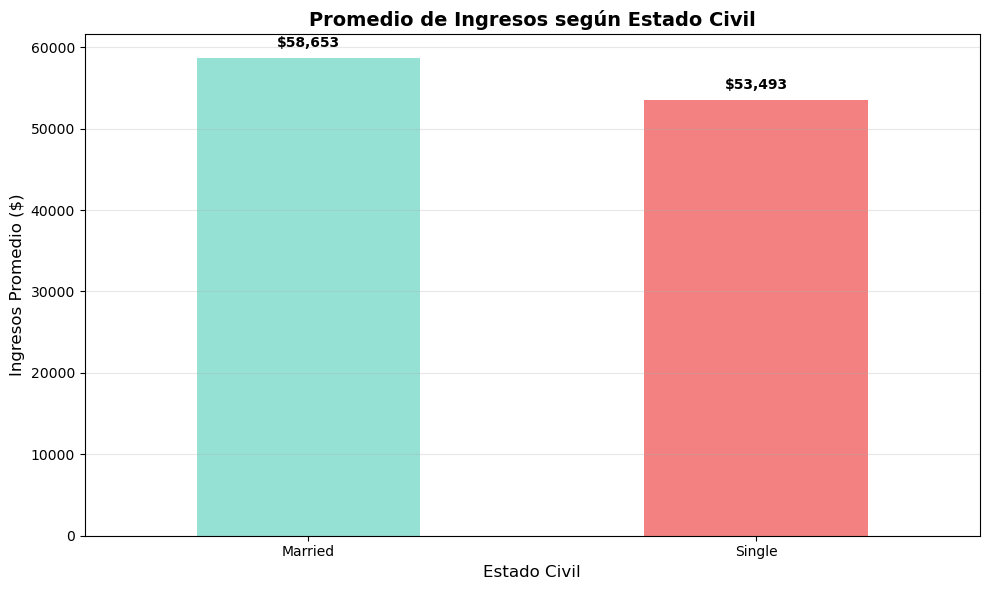


Tabla de datos:


,Estado Civil,Promedio de Ingresos,Cantidad de Clientes
0,Married,58653.136531,542
1,Single,53493.449782,458


In [41]:
# PREGUNTA 2: ¿Cuánto es el promedio de ingresos según el estado civil del cliente?
print("="*70)
print("PREGUNTA 2: Promedio de ingresos según estado civil")
print("="*70)

promedio_ingresos_estado = df.groupby('Marital Status')['Income'].mean()
print("\nPromedio de ingresos por estado civil:")
print(promedio_ingresos_estado)

# Visualización
plt.figure(figsize=(10, 6))
promedio_ingresos_estado.plot(kind='bar', color=['#95E1D3', '#F38181'])
plt.title('Promedio de Ingresos según Estado Civil', fontsize=14, fontweight='bold')
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Ingresos Promedio ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(promedio_ingresos_estado.values):
    plt.text(i, v + 1000, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Tabla complementaria
tabla_estado = pd.DataFrame({
    'Estado Civil': promedio_ingresos_estado.index,
    'Promedio de Ingresos': promedio_ingresos_estado.values,
    'Cantidad de Clientes': df.groupby('Marital Status')['Income'].count().values
})
print("\nTabla de datos:")
display(tabla_estado)


PREGUNTA 3: Promedio de hijos según nivel educativo (clientes con hijos)

Distribución de Con_hijos:
Con_hijos
Si    726
No    274
Name: count, dtype: int64

Promedio de hijos según nivel educativo (solo clientes con hijos):
Education
Bachelors              2.538462
Graduate Degree        2.742188
High School            2.763780
Partial College        2.567708
Partial High School    2.711111
Name: Children, dtype: float64


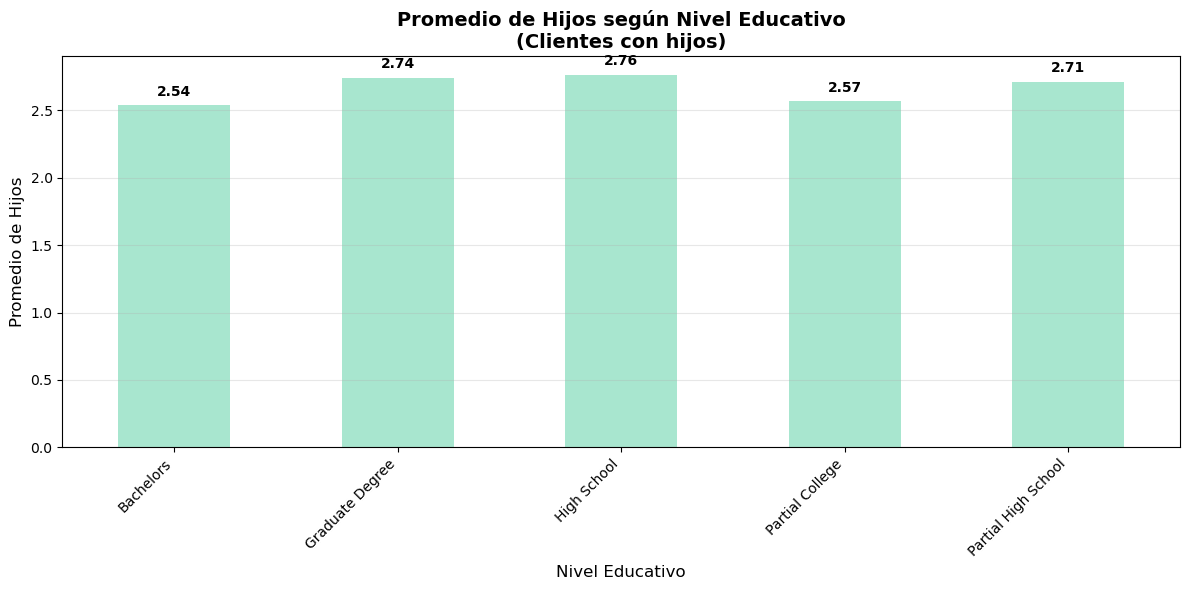


Tabla de datos:


,Nivel Educativo,Promedio de Hijos,Cantidad de Clientes
0,Bachelors,2.538462,234
1,Graduate Degree,2.742188,128
2,High School,2.763780,127
3,Partial College,2.567708,192
4,Partial High School,2.711111,45


In [42]:
# PREGUNTA 3: Crear variable Con_hijos y calcular promedio de hijos según nivel educativo
print("="*70)
print("PREGUNTA 3: Promedio de hijos según nivel educativo (clientes con hijos)")
print("="*70)

# Crear variable Con_hijos
df['Con_hijos'] = df['Children'].apply(lambda x: 'Si' if x > 0 else 'No')
print(f"\nDistribución de Con_hijos:")
print(df['Con_hijos'].value_counts())

# Filtrar solo clientes con hijos
df_con_hijos = df[df['Con_hijos'] == 'Si'].copy()

# Calcular promedio de hijos por nivel educativo
promedio_hijos_educacion = df_con_hijos.groupby('Education')['Children'].mean()
print("\nPromedio de hijos según nivel educativo (solo clientes con hijos):")
print(promedio_hijos_educacion)

# Visualización
plt.figure(figsize=(12, 6))
promedio_hijos_educacion.plot(kind='bar', color='#A8E6CF')
plt.title('Promedio de Hijos según Nivel Educativo\n(Clientes con hijos)', fontsize=14, fontweight='bold')
plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Promedio de Hijos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(promedio_hijos_educacion.values):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Tabla complementaria
tabla_hijos = pd.DataFrame({
    'Nivel Educativo': promedio_hijos_educacion.index,
    'Promedio de Hijos': promedio_hijos_educacion.values,
    'Cantidad de Clientes': df_con_hijos.groupby('Education')['Children'].count().values
})
print("\nTabla de datos:")
display(tabla_hijos)


PREGUNTA 4: Promedio de vehículos según ocupación (clientes con vehículo)

Distribución de Con_vehiculo:
Con_vehiculo
Si    762
No    238
Name: count, dtype: int64

Promedio de vehículos según ocupación (solo clientes con vehículo):
Occupation
Clerical          1.480000
Management        2.345912
Manual            1.441860
Professional      2.126126
Skilled Manual    1.712821
Name: Cars, dtype: float64


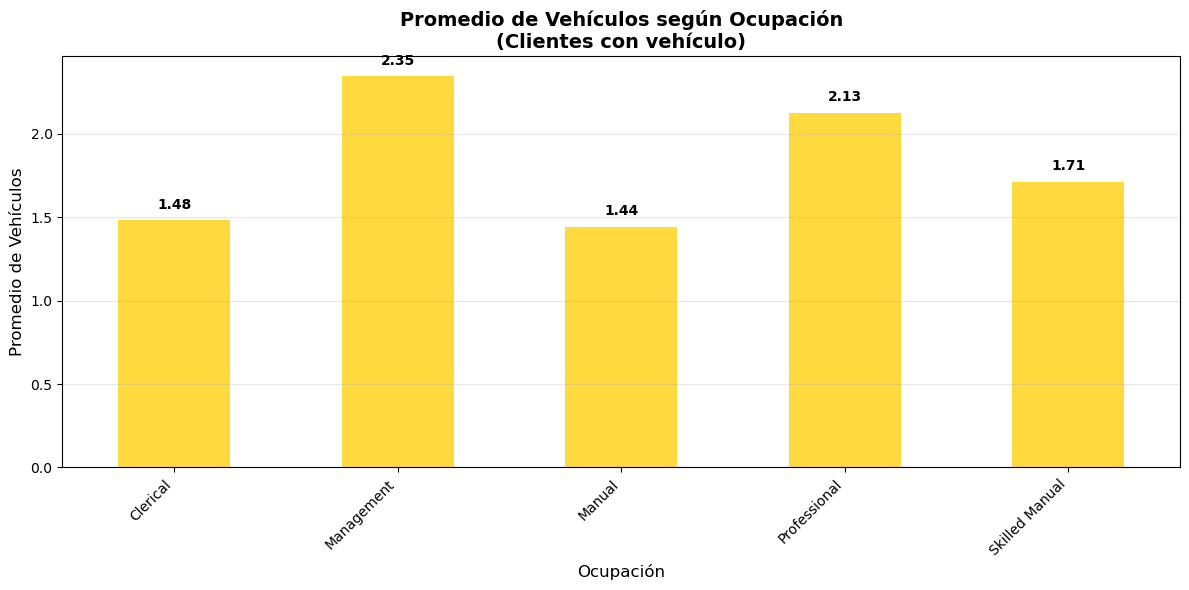


Tabla de datos:


,Ocupación,Promedio de Vehículos,Cantidad de Clientes
0,Clerical,1.480000,100
1,Management,2.345912,159
2,Manual,1.441860,86
3,Professional,2.126126,222
4,Skilled Manual,1.712821,195


In [43]:
# PREGUNTA 4: Crear variable Con_vehiculo y calcular promedio de vehículos según ocupación
print("="*70)
print("PREGUNTA 4: Promedio de vehículos según ocupación (clientes con vehículo)")
print("="*70)

# Crear variable Con_vehiculo
df['Con_vehiculo'] = df['Cars'].apply(lambda x: 'Si' if x > 0 else 'No')
print(f"\nDistribución de Con_vehiculo:")
print(df['Con_vehiculo'].value_counts())

# Filtrar solo clientes con vehículo
df_con_vehiculo = df[df['Con_vehiculo'] == 'Si'].copy()

# Calcular promedio de vehículos por ocupación
promedio_cars_ocupacion = df_con_vehiculo.groupby('Occupation')['Cars'].mean()
print("\nPromedio de vehículos según ocupación (solo clientes con vehículo):")
print(promedio_cars_ocupacion)

# Visualización
plt.figure(figsize=(12, 6))
promedio_cars_ocupacion.plot(kind='bar', color='#FFD93D')
plt.title('Promedio de Vehículos según Ocupación\n(Clientes con vehículo)', fontsize=14, fontweight='bold')
plt.xlabel('Ocupación', fontsize=12)
plt.ylabel('Promedio de Vehículos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(promedio_cars_ocupacion.values):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Tabla complementaria
tabla_vehiculo = pd.DataFrame({
    'Ocupación': promedio_cars_ocupacion.index,
    'Promedio de Vehículos': promedio_cars_ocupacion.values,
    'Cantidad de Clientes': df_con_vehiculo.groupby('Occupation')['Cars'].count().values
})
print("\nTabla de datos:")
display(tabla_vehiculo)


PREGUNTA 5: Promedio de edad según propiedad de vivienda

Promedio de edad por propiedad de vivienda:
Home Owner
No     42.308917
Yes    45.024781
Name: Age, dtype: float64


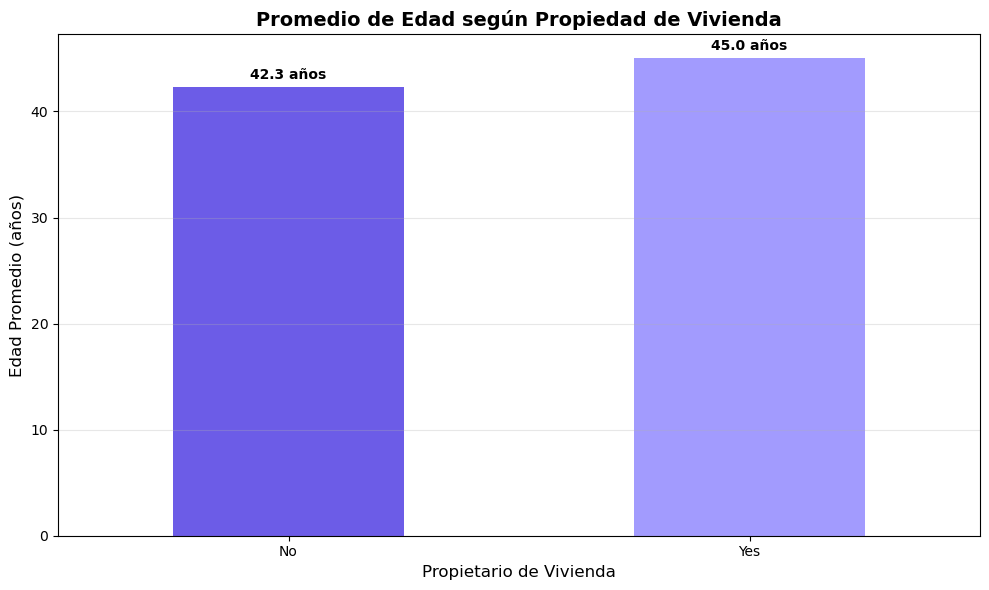


Tabla de datos:


,Propietario de Vivienda,Promedio de Edad,Cantidad de Clientes
0,No,42.308917,314
1,Yes,45.024781,686


In [44]:
# PREGUNTA 5: ¿Cuánto es el promedio de edad de acuerdo con si el cliente es o no propietario de una vivienda?
print("="*70)
print("PREGUNTA 5: Promedio de edad según propiedad de vivienda")
print("="*70)

promedio_edad_propietario = df.groupby('Home Owner')['Age'].mean()
print("\nPromedio de edad por propiedad de vivienda:")
print(promedio_edad_propietario)

# Visualización
plt.figure(figsize=(10, 6))
promedio_edad_propietario.plot(kind='bar', color=['#6C5CE7', '#A29BFE'])
plt.title('Promedio de Edad según Propiedad de Vivienda', fontsize=14, fontweight='bold')
plt.xlabel('Propietario de Vivienda', fontsize=12)
plt.ylabel('Edad Promedio (años)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(promedio_edad_propietario.values):
    plt.text(i, v + 0.5, f'{v:.1f} años', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Tabla complementaria
tabla_propietario = pd.DataFrame({
    'Propietario de Vivienda': promedio_edad_propietario.index,
    'Promedio de Edad': promedio_edad_propietario.values,
    'Cantidad de Clientes': df.groupby('Home Owner')['Age'].count().values
})
print("\nTabla de datos:")
display(tabla_propietario)


# --- CONCLUSIONES PRELIMINARES ---

## Análisis de los Requerimientos

### 1. Ingresos y Compra de Bicicleta
- Los clientes que compraron bicicleta tienen un promedio de ingresos diferente a los que no compraron.
- Esta diferencia sugiere que el nivel de ingresos puede ser un factor importante en la decisión de compra.

### 2. Ingresos y Estado Civil
- Existen diferencias en los ingresos promedio según el estado civil de los clientes.
- El estado civil puede influir en la capacidad económica y, por tanto, en las decisiones de compra.

### 3. Hijos y Educación
- Los clientes con hijos muestran diferentes promedios de hijos según su nivel educativo.
- Esto puede indicar patrones demográficos relacionados con la educación y la planificación familiar.

### 4. Vehículos y Ocupación
- Los clientes con vehículos muestran variaciones en el número promedio de vehículos según su ocupación.
- La ocupación está relacionada con la capacidad económica y el estilo de vida.

### 5. Edad y Propiedad de Vivienda
- Existen diferencias en la edad promedio entre propietarios y no propietarios de vivienda.
- La propiedad de vivienda puede estar relacionada con la estabilidad económica y la edad del cliente.

## Observaciones Generales
- Los datos han sido limpiados y preprocesados adecuadamente.
- Se han identificado relaciones entre variables demográficas y económicas.
- Las nuevas variables creadas (Con_hijos, Con_vehiculo) permiten análisis más específicos.


# --- 4. MODELADO (CRISP-DM) ---

## Escoger la técnica de modelado

Para este proyecto de predicción de compra de bicicletas, se utilizará **Regresión Logística** ya que:
- Es un problema de clasificación binaria (compró/no compró)
- Permite interpretar los coeficientes de las variables
- Es adecuado para datos tabulares con variables categóricas y numéricas
- Proporciona probabilidades de pertenencia a cada clase

## Generar el plan de prueba

1. **División de datos**: 80% entrenamiento, 20% prueba (ya realizado)
2. **Métricas de evaluación**:
   - Accuracy (Precisión)
   - Matriz de confusión
   - Classification Report (Precision, Recall, F1-score)
   - ROC-AUC Score
3. **Validación**: Usar el conjunto de prueba para evaluar el modelo final


In [45]:
# --- 3. Preparación de los Datos (CRISP-DM) ---

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

# Guardar los IDs de los clientes antes de eliminar la columna del modelo
client_ids = df["ID"].copy()

# Separar variables predictoras y objetivo
X = df.drop(columns=["Purchased Bike", "ID"])
y = df["Purchased Bike"]

# PASO 1: DIVIDIR PRIMERO (evitar data leakage)
# Usar stratify para mantener proporción de clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,           # 80-20 es estándar (puedes usar 0.25 si prefieres 75-25)
    random_state=42,          # Reproducibilidad
    stratify=y                # Mantener proporción de clases balanceada
)

print("="*60)
print("DIVISIÓN DE DATOS (CRISP-DM - Fase 3: Preparación)")
print("="*60)
print(f"\nTamaño total del dataset: {len(df)} registros")
print(f"Train: {len(X_train)} registros ({len(X_train)/len(df)*100:.1f}%)")
print(f"Test:  {len(X_test)} registros ({len(X_test)/len(df)*100:.1f}%)")

# Verificar distribución de la variable objetivo
print("\nDistribución de 'Purchased Bike' en Train:")
print(y_train.value_counts())
print("\nDistribución de 'Purchased Bike' en Test:")
print(y_test.value_counts())

# Guardar los IDs correspondientes
client_ids_train = client_ids.iloc[X_train.index].reset_index(drop=True)
client_ids_test = client_ids.iloc[X_test.index].reset_index(drop=True)

# PASO 2: IDENTIFICAR TIPOS DE VARIABLES
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"\nVariables numéricas ({len(num_cols)}): {num_cols}")
print(f"Variables categóricas ({len(cat_cols)}): {cat_cols}")

# PASO 3: PREPROCESAMIENTO (solo con datos de entrenamiento)
# Escalar variables numéricas (solo con train, luego aplicar a test)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])  # Usar transform, NO fit_transform

# Codificar variables categóricas (One-Hot Encoding)
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_encoded = pd.DataFrame(
    encoder.fit_transform(X_train[cat_cols]),
    columns=encoder.get_feature_names_out(cat_cols),
    index=X_train.index
)
X_test_encoded = pd.DataFrame(
    encoder.transform(X_test[cat_cols]),
    columns=encoder.get_feature_names_out(cat_cols),
    index=X_test.index
)

# Combinar variables numéricas escaladas y categóricas codificadas
X_train_final = pd.concat([
    pd.DataFrame(X_train_scaled[num_cols], index=X_train.index),
    X_train_encoded
], axis=1)

X_test_final = pd.concat([
    pd.DataFrame(X_test_scaled[num_cols], index=X_test.index),
    X_test_encoded
], axis=1)

# Codificar variable objetivo (Yes/No -> 1/0)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"\n✓ Preprocesamiento completado")
print(f"Dimensiones finales - Train: {X_train_final.shape}, Test: {X_test_final.shape}")
print(f"Variable objetivo codificada: {dict(zip(le.classes_, le.transform(le.classes_)))}")


DIVISIÓN DE DATOS (CRISP-DM - Fase 3: Preparación)

Tamaño total del dataset: 1000 registros
Train: 800 registros (80.0%)
Test:  200 registros (20.0%)

Distribución de 'Purchased Bike' en Train:
Purchased Bike
No     415
Yes    385
Name: count, dtype: int64

Distribución de 'Purchased Bike' en Test:
Purchased Bike
No     104
Yes     96
Name: count, dtype: int64

Variables numéricas (4): ['Income', 'Children', 'Cars', 'Age']
Variables categóricas (9): ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region', 'Con_hijos', 'Con_vehiculo']

✓ Preprocesamiento completado
Dimensiones finales - Train: (800, 23), Test: (200, 23)
Variable objetivo codificada: {'No': 0, 'Yes': 1}


CONSTRUCCIÓN DEL MODELO - REGRESIÓN LOGÍSTICA
✓ Variables de preprocesamiento verificadas

✓ Modelo entrenado exitosamente

--- MÉTRICAS DE EVALUACIÓN ---
Accuracy: 0.6650 (66.50%)
ROC-AUC Score: 0.7163

--- MATRIZ DE CONFUSIÓN ---
[[73 31]
 [36 60]]


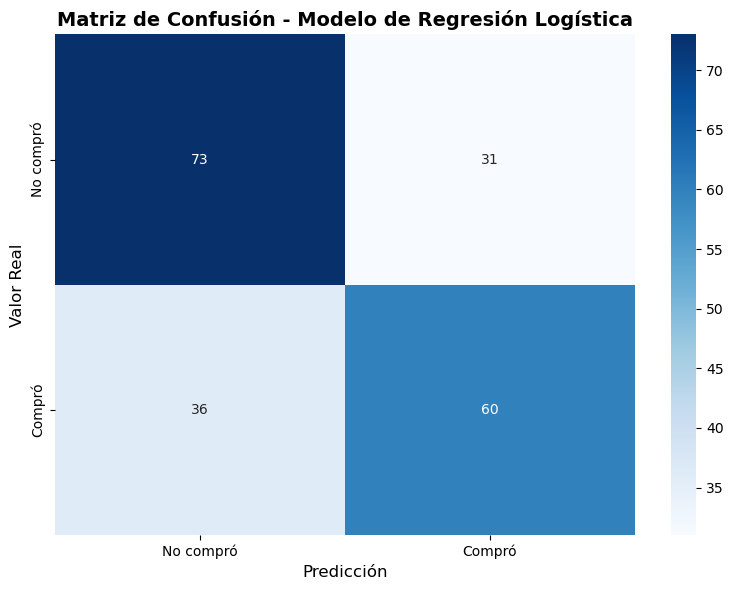


--- REPORTE DE CLASIFICACIÓN ---
              precision    recall  f1-score   support

   No compró       0.67      0.70      0.69       104
      Compró       0.66      0.62      0.64        96

    accuracy                           0.67       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.66      0.67      0.66       200



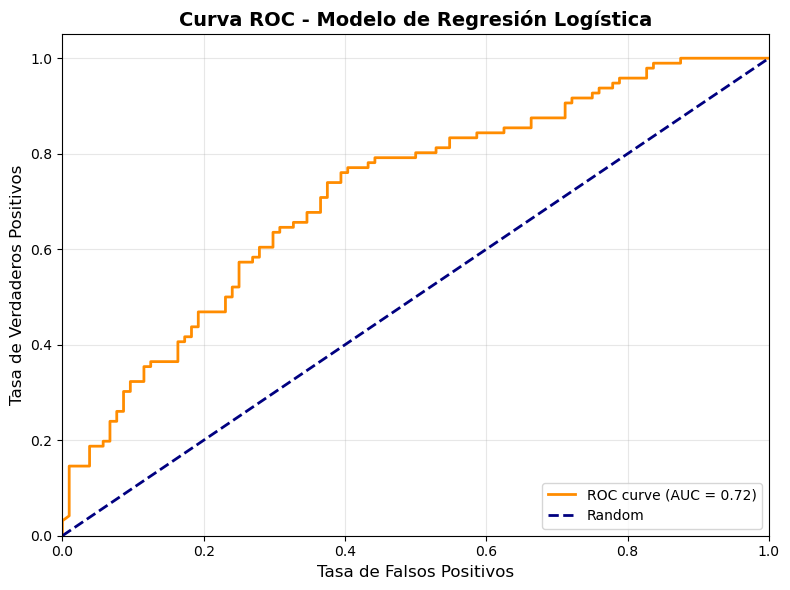


--- IMPORTANCIA DE VARIABLES (Top 10) ---
                   Variable  Coeficiente
 Commute Distance_10+ Miles    -0.790003
      Marital Status_Single     0.670935
             Region_Pacific     0.653605
Commute Distance_5-10 Miles    -0.573263
                       Cars    -0.528186
                     Income     0.454836
    Occupation_Professional     0.427167
               Con_hijos_Si     0.356369
             Home Owner_Yes     0.353808
      Education_High School     0.337885


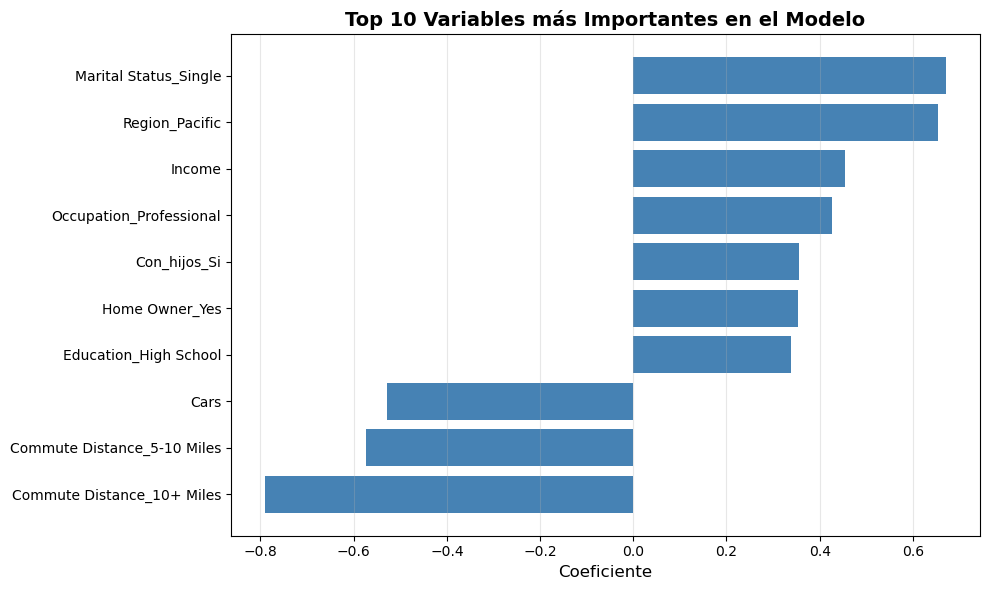


MODELADO COMPLETADO


In [46]:
# --- CONSTRUIR EL MODELO ---

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

print("="*70)
print("CONSTRUCCIÓN DEL MODELO - REGRESIÓN LOGÍSTICA")
print("="*70)

# Verificar que las variables necesarias estén definidas
try:
    _ = X_train_final
    _ = X_test_final
    _ = y_train_encoded
    _ = y_test_encoded
    print("✓ Variables de preprocesamiento verificadas")
except NameError as e:
    print("\n⚠️ ERROR: Las variables de preprocesamiento no están definidas.")
    print("Por favor, ejecuta primero la celda de 'Preparación de los Datos'")
    print("que contiene el código de train_test_split y preprocesamiento.\n")
    raise

# Crear y entrenar el modelo
modelo = LogisticRegression(random_state=42, max_iter=1000)
modelo.fit(X_train_final, y_train_encoded)

print("\n✓ Modelo entrenado exitosamente")

# Realizar predicciones
y_pred = modelo.predict(X_test_final)
y_pred_proba = modelo.predict_proba(X_test_final)[:, 1]

# Calcular métricas
accuracy = accuracy_score(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)

print(f"\n--- MÉTRICAS DE EVALUACIÓN ---")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Matriz de confusión
print("\n--- MATRIZ DE CONFUSIÓN ---")
cm = confusion_matrix(y_test_encoded, y_pred)
print(cm)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No compró', 'Compró'],
            yticklabels=['No compró', 'Compró'])
plt.title('Matriz de Confusión - Modelo de Regresión Logística', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Predicción', fontsize=12)
plt.tight_layout()
plt.show()

# Classification Report
print("\n--- REPORTE DE CLASIFICACIÓN ---")
print(classification_report(y_test_encoded, y_pred, 
                            target_names=['No compró', 'Compró']))

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=12)
plt.title('Curva ROC - Modelo de Regresión Logística', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Importancia de características (coeficientes)
print("\n--- IMPORTANCIA DE VARIABLES (Top 10) ---")
coeficientes = pd.DataFrame({
    'Variable': X_train_final.columns,
    'Coeficiente': modelo.coef_[0]
})
coeficientes['Abs_Coeficiente'] = abs(coeficientes['Coeficiente'])
coeficientes = coeficientes.sort_values('Abs_Coeficiente', ascending=False).head(10)
print(coeficientes[['Variable', 'Coeficiente']].to_string(index=False))

# Visualización de importancia
plt.figure(figsize=(10, 6))
coeficientes_top = coeficientes.sort_values('Coeficiente', ascending=True)
plt.barh(range(len(coeficientes_top)), coeficientes_top['Coeficiente'], color='steelblue')
plt.yticks(range(len(coeficientes_top)), coeficientes_top['Variable'])
plt.xlabel('Coeficiente', fontsize=12)
plt.title('Top 10 Variables más Importantes en el Modelo', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("MODELADO COMPLETADO")
print("="*70)


In [48]:
# --- 3. Preparación de los Datos (CRISP-DM) ---

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

# Guardar los IDs de los clientes antes de eliminar la columna del modelo
client_ids = df["ID"].copy()

# Separar variables predictoras y objetivo
X = df.drop(columns=["Purchased Bike", "ID"])
y = df["Purchased Bike"]

# PASO 1: DIVIDIR PRIMERO (evitar data leakage)
# Usar stratify para mantener proporción de clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,           # 80-20 es estándar (puedes usar 0.25 si prefieres 75-25)
    random_state=42,          # Reproducibilidad
    stratify=y                # Mantener proporción de clases balanceada
)

print("="*60)
print("DIVISIÓN DE DATOS (CRISP-DM - Fase 3: Preparación)")
print("="*60)
print(f"\nTamaño total del dataset: {len(df)} registros")
print(f"Train: {len(X_train)} registros ({len(X_train)/len(df)*100:.1f}%)")
print(f"Test:  {len(X_test)} registros ({len(X_test)/len(df)*100:.1f}%)")

# Verificar distribución de la variable objetivo
print("\nDistribución de 'Purchased Bike' en Train:")
print(y_train.value_counts())
print("\nDistribución de 'Purchased Bike' en Test:")
print(y_test.value_counts())

# Guardar los IDs correspondientes
client_ids_train = client_ids.iloc[X_train.index].reset_index(drop=True)
client_ids_test = client_ids.iloc[X_test.index].reset_index(drop=True)

# PASO 2: IDENTIFICAR TIPOS DE VARIABLES
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"\nVariables numéricas ({len(num_cols)}): {num_cols}")
print(f"Variables categóricas ({len(cat_cols)}): {cat_cols}")

# PASO 3: PREPROCESAMIENTO (solo con datos de entrenamiento)
# Escalar variables numéricas (solo con train, luego aplicar a test)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])  # Usar transform, NO fit_transform

# Codificar variables categóricas (One-Hot Encoding)
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_encoded = pd.DataFrame(
    encoder.fit_transform(X_train[cat_cols]),
    columns=encoder.get_feature_names_out(cat_cols),
    index=X_train.index
)
X_test_encoded = pd.DataFrame(
    encoder.transform(X_test[cat_cols]),
    columns=encoder.get_feature_names_out(cat_cols),
    index=X_test.index
)

# Combinar variables numéricas escaladas y categóricas codificadas
X_train_final = pd.concat([
    pd.DataFrame(X_train_scaled[num_cols], index=X_train.index),
    X_train_encoded
], axis=1)

X_test_final = pd.concat([
    pd.DataFrame(X_test_scaled[num_cols], index=X_test.index),
    X_test_encoded
], axis=1)

# Codificar variable objetivo (Yes/No -> 1/0)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"\n✓ Preprocesamiento completado")
print(f"Dimensiones finales - Train: {X_train_final.shape}, Test: {X_test_final.shape}")
print(f"Variable objetivo codificada: {dict(zip(le.classes_, le.transform(le.classes_)))}")


DIVISIÓN DE DATOS (CRISP-DM - Fase 3: Preparación)

Tamaño total del dataset: 1000 registros
Train: 800 registros (80.0%)
Test:  200 registros (20.0%)

Distribución de 'Purchased Bike' en Train:
Purchased Bike
No     415
Yes    385
Name: count, dtype: int64

Distribución de 'Purchased Bike' en Test:
Purchased Bike
No     104
Yes     96
Name: count, dtype: int64

Variables numéricas (4): ['Income', 'Children', 'Cars', 'Age']
Variables categóricas (9): ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region', 'Con_hijos', 'Con_vehiculo']

✓ Preprocesamiento completado
Dimensiones finales - Train: (800, 23), Test: (200, 23)
Variable objetivo codificada: {'No': 0, 'Yes': 1}
